In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

datos = pd.read_csv("datos_punto2.csv")

datos

,t(s),x(cm),sigmax(cm)
0,6.5,3.2,1.2
1,9.3,9.7,2.1
2,14.6,11.3,3.6


---
## 2.1

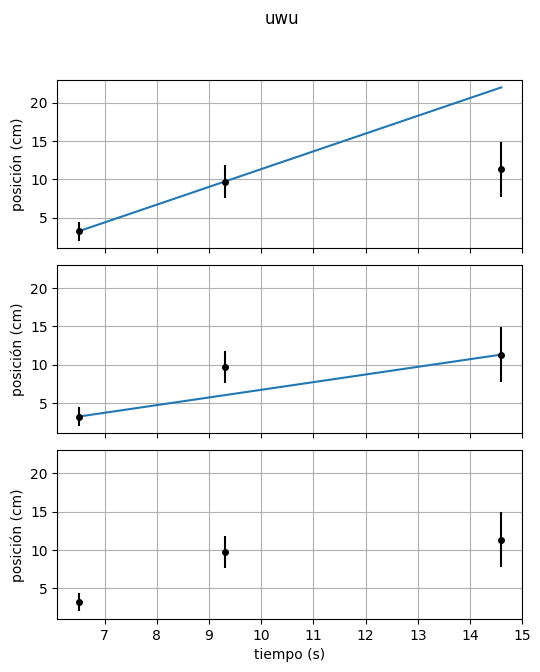

In [2]:
def plot_points(index, xdata, ydata, yerror):
    axis[index].errorbar(xdata,ydata, yerr=yerror, fmt=".", color="black", markersize=8)
    

def reg_values(m,b,xdata):
    ydata = []
    for ii in range (len(xdata)):
        ydata.append(m*xdata[ii] + b)
    return ydata
    
    
def find_mb(x1, x2, y1, y2):
    m = (y2-y1)/(x2-x1)
    b = -m*x1 + y1
    return m,b 
    
    
def plot_line(obj, m, b):
    XX = np.linspace(xmin, xmax, 2)
    YY = []
    for ii in range (2):
        YY.append(m*XX[ii] + b)
    obj.plot(XX, YY)
    
        
xmin = datos["t(s)"][0]    
xmax = datos["t(s)"][2]

m1, b1 = find_mb(datos["t(s)"][0], datos["t(s)"][1], datos["x(cm)"][0], datos["x(cm)"][1])
m2, b2 = find_mb(datos["t(s)"][0], datos["t(s)"][2], datos["x(cm)"][0], datos["x(cm)"][2])

y1data = reg_values(m1, b1, datos["t(s)"])
y2data = reg_values(m2, b2, datos["t(s)"])


fig = plt.figure(figsize=(6,7))
gs = fig.add_gridspec(3, hspace=0.1) #Sin espacio entre las gráficas
axis = gs.subplots(sharex=True, sharey=True)
fig.suptitle("uwu")
for ii in range (len(axis)):
    plot_points(ii, datos["t(s)"], datos["x(cm)"], datos["sigmax(cm)"])
    axis[ii].set(ylabel="posición (cm)")
    #axis[ii].legend()
    #axis[ii].label_outer() #Quita los ticks de las gráficas no fronteras
    #axis[ii].minorticks_on()
    axis[ii].grid(which="both")
    axis[ii].set_axisbelow(True)

plot_line(axis[0], m1, b1)
plot_line(axis[1], m2, b2)




plt.xlabel("tiempo (s)")
#plt.savefig("12.pdf")
plt.show()

---
## 2.2

In [3]:
def find_xi(xdata, ydata, yerror, f):
    suma = 0
    for ii in range (len(xdata)):
        suma += ((ydata[ii] - f[ii])/yerror[ii])**2
    return suma

xi1 = find_xi(datos["t(s)"], datos["x(cm)"], datos["sigmax(cm)"], y1data)
xi2 = find_xi(datos["t(s)"], datos["x(cm)"], datos["sigmax(cm)"], y2data)

In [4]:
print (xi1)
print (xi2)

8.8400031887755
3.1043083900226724
